<span style="font-family:Frutiger;font-size:2em;">***Ford Gobike Data Exploration By Antonius Nesseim***</span>

<span style="font-family:Frutiger;font-size:2em;">Table of Contents</span>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#assessing">Load & Assessing data</a></li>
<li><a href="#cleaning">Cleaning data</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
</ul>


<a id='intro'></a>
## <span style="font-family:Frutiger;font-size:1em;">Introduction </span>
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

<a id='assessing'></a>
## <span style="font-family:Frutiger;font-size:1em;">Load & Assessing data </span>

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Exploring data 
df.shape

(183412, 16)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
#Check for duplication 
df.duplicated().sum()

0

In [9]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### What is the structure of your dataset?

> Data consistes of 183412 rows and 16 coulmns which describe 183412 bike trip with 16 detail for every trip .

### What is/are the main feature(s) of interest in your dataset?

> the main features interested me was member agre , member gender ,user tybe m Trip duration and trip date .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> in my obinien themost important features are the relation between Trip duration and member gender , user tybe and user age we can get the stasions distance form start and end stasions long and lat to check the relaction between the gender user tybe age and distance 

In [11]:
# coby the data fram to a new one to work on the new data and keeb the Original.
df_new=df.copy()

<a id='cleaning'></a>
## cleaing Data 

**What we need to clean here**

 - 1st is to convert Start and end time  to time formate.
 - 2nd is to change the bike share tybe to be bool.
 - 3rd is to convert start_station_id,end_station_id and bike_id to Sting .
 - 4th is to separate "Year", "Month","Day" and "hours" form strat time to a new coulmns.
 - 5th convert User type and gender to category format.
 - 6th add new column by converting duration_sec to Duration in minutes. 
 - 7th calculate the distance between start and end Stations
 - 8th need to calculate member age and add it in a new column.

In [12]:
#1- change Start and end time format 
df_new['start_time']=pd.to_datetime(df_new['start_time'])
df_new['end_time']=pd.to_datetime(df_new['end_time'])

In [12]:
#2- Change bike share tybe to be bool
df_new.bike_share_for_all_trip = (df_new.bike_share_for_all_trip == 'Yes')

In [13]:
#3- convert the start_station_id,end_station_id and bike_id to Sting 
df_new.start_station_id =df_new.start_station_id.astype(str)
df_new.end_station_id =df_new.end_station_id.astype(str)
df_new.bike_id =df_new.bike_id.astype(str)


In [14]:
#4- seperating Year, Month ,Day and Start hour from the start time .
#https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values
#https://www.tutorialspoint.com/write-a-program-in-python-to-split-the-date-column-into-day-month-year-in-multiple-columns-of-a-given-dataframe

df_new['start_time']=pd.to_datetime(df_new.start_time, format='%Y-%m-%d %H:%M:%S')
df_new['start_date'] = df_new.start_time.dt.strftime('%Y-%m-%d') 
df_new['start_day'] = df_new.start_time.dt.strftime('%A')
df_new['start_month'] = df_new.start_time.dt.strftime('%B')
df_new['start_hour'] = df_new.start_time.dt.strftime('%H')

In [15]:
5#Changing the user_type and  member_gender to category format
df_new['user_type'] =df_new['user_type'].astype('category')
df_new['member_gender'] =df_new['member_gender'].astype('category')

In [16]:
#6 ad new comumn by converting sec to min 
df_new['Duration_minute'] = df_new ['duration_sec']/60

In [17]:
#7 Need to calculate the distance between start and end Stations
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from haversine import haversine, Unit

df_new['distance']=df_new.apply(lambda x: haversine((x['start_station_latitude'], x['start_station_longitude']),
                                                        (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [18]:
#8 need to calculate member age 
df_new['member_age'] = 2019 - df_new['member_birth_year']

In [19]:
df_new.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_day,start_month,start_hour,Duration_minute,distance,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,2019-02-28,Thursday,February,17,869.750000,0.544709,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,2019-02-28,Thursday,February,18,708.683333,1.743002,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,2019-02-28,Thursday,February,12,1030.900000,2.704549,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,2019-02-28,Thursday,February,17,608.166667,0.260739,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,2019-02-28,Thursday,February,23,26.416667,2.409305,45.0


In [20]:
df_new.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,Duration_minute,distance,member_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,12.101307,1.690661,34.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,29.906496,1.097591,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,0.000000,18.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,5.416667,0.910957,27.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,8.566667,1.430740,32.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,13.266667,2.225690,39.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1424.066667,69.469337,141.000000


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       


<a id='univariate'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [132]:
# add the base color fot all figs 
base_color = sb.color_palette()[0]

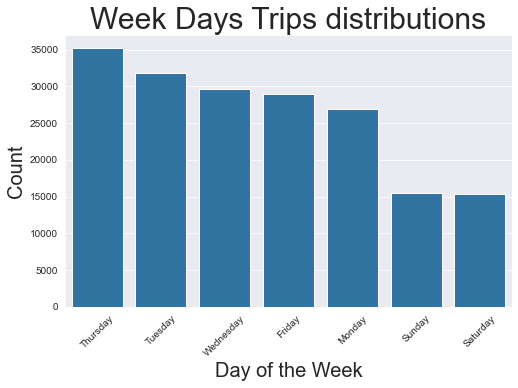

In [117]:
plt.rcParams['figure.figsize'] = 8, 5
sb.set_style('darkgrid')
freq =df_new['start_day'].value_counts()
# Get the indexes of the Series
gen_order_D= freq.index

# Plot the bar chart in the decreasing order of the frequency of the `Start_Day`
sb.countplot(data=df_new, x='start_day', order=gen_order_D, color=base_color);
plt.xlabel('Day of the Week',size=20);
plt.ylabel('Count',size=20);
plt.title('Week Days Trips distributions',size=30)
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=45)
plt.show()

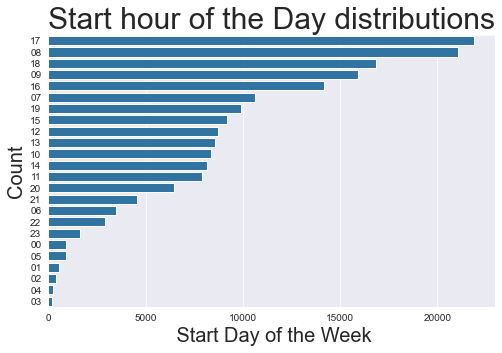

In [23]:
freq =df_new['start_hour'].value_counts()
# Get the indexes of the Series
gen_order_H= freq.index

# Plot the bar chart in the decreasing order of the frequency of the `start_hour`
plt.rcParams['figure.figsize'] = 8, 5
sb.countplot(data=df_new, y='start_hour', order=gen_order_H,color=base_color);
plt.title('Start hour of the Day distributions',size=30)
plt.xlabel(' Start Day of the Week',size=20);
plt.ylabel('Count',size=20);

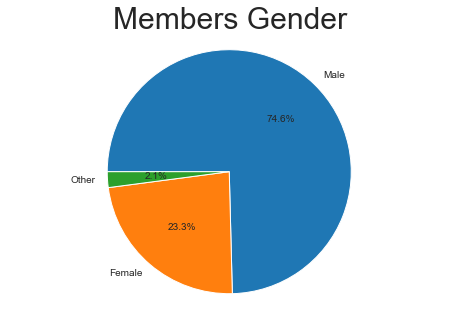

In [24]:
# plotting genders 
#to add percentage to the Pie Chart i found reseult in:http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php
counts_m = df_new['member_gender'].value_counts()

plt.pie(counts_m, labels = counts_m.index, startangle = 180,counterclock = False,autopct='%1.1f%%');
plt.axis('equal')
plt.title('Members Gender',size=30)
plt.show()

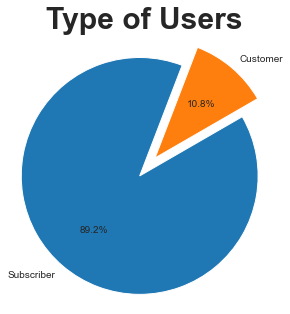

In [25]:
# plotting types of users 
counts_u = df_new['user_type'].value_counts()
explode = (0, 0.2)
plt.pie(counts_u, labels = counts_u.index,explode=explode, startangle = 30,counterclock = False,autopct='%1.1f%%');
plt.axis('equal')
plt.axis('square')
plt.title('Type of Users',size=30,fontweight='bold')
plt.show()

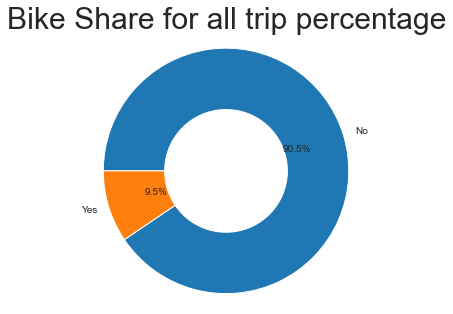

In [26]:
counts_s = df_new['bike_share_for_all_trip'].value_counts()

plt.pie(counts_s, labels = counts_s.index, startangle = 180,wedgeprops = {'width' : 0.5},counterclock = False,autopct='%1.1f%%');
plt.axis('square')
plt.title('Bike Share for all trip percentage',size=30)
plt.show()

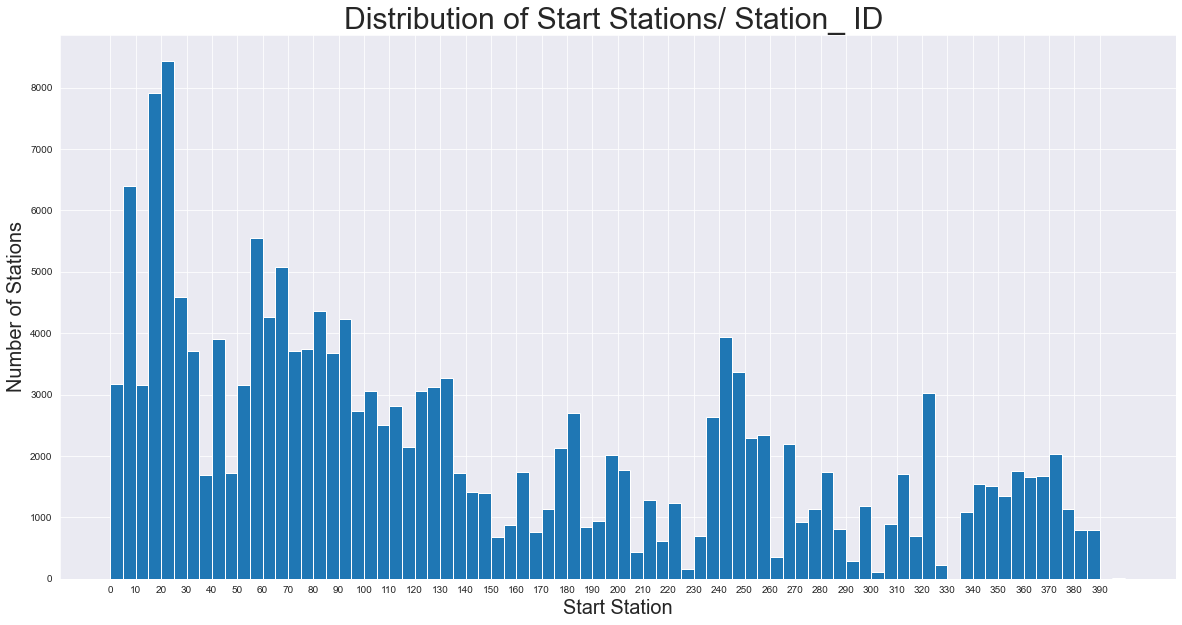

In [27]:
# Plotting start station id distribution on a standard scale
step_size=5
bins = np.arange(0, df_new['start_station_id'].astype(float).max()+step_size, step_size)
plt.figure(figsize=[20, 10])
plt.xticks(range(0, 400, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations/ Station_ ID ',size=30)
plt.xlabel('Start Station',size=20)
plt.ylabel('Number of Stations',size=20)
plt.show()

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

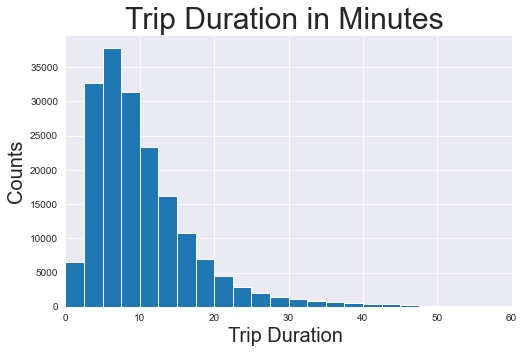

In [30]:
bins = np.arange(0, df_new['Duration_minute'].max()+2.5, 2.5)

# Plot the histogram for the Trip duration in minute 
plt.hist(data=df_new, x='Duration_minute', bins=bins);
plt.xlim((0,60));
plt.title('Trip Duration in Minutes ',size=30)
plt.xlabel('Trip Duration ',size=20)
plt.ylabel('Counts',size=20)
plt.show()

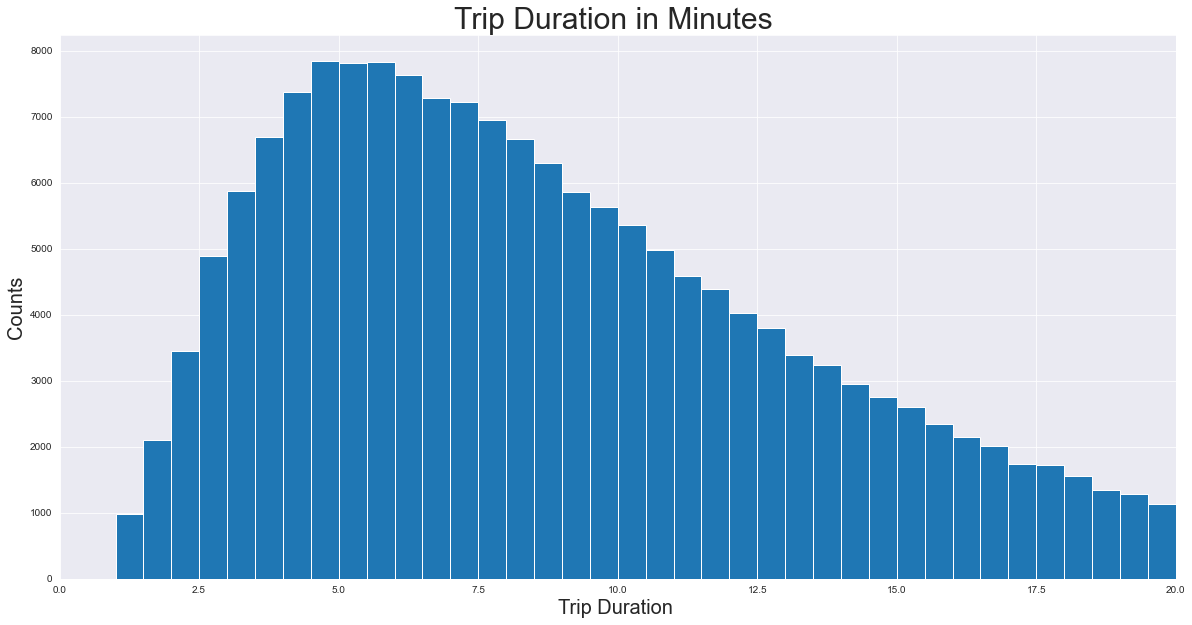

In [31]:
# we niticed that most of trips durations are lees that 20 M so lets limite the x-axis to 20 M and check again 
bins = np.arange(0, df_new['Duration_minute'].max()+0.5,0.5)

# Plot the histogram for the height column
plt.figure(figsize=[20, 10])
plt.hist(data=df_new, x='Duration_minute', bins=bins);
plt.xlim((0,20));
plt.title('Trip Duration in Minutes ',size=30)
plt.xlabel('Trip Duration ',size=20)
plt.ylabel('Counts',size=20)
plt.show()

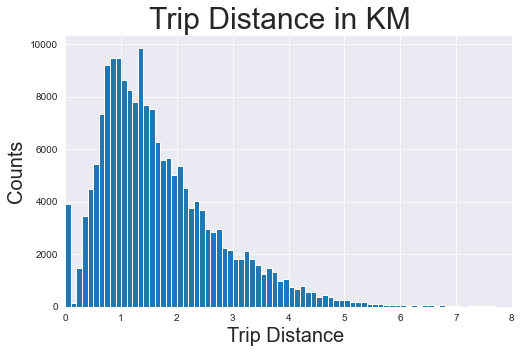

In [32]:
bins = np.arange(0, df_new['distance'].max()+.2,0.1)

# Plot the histogram for the height column
plt.hist(data=df_new, x='distance', bins=bins);
plt.xlim((0,8));
plt.title('Trip Distance in KM  ',size=30)
plt.xlabel('Trip Distance ',size=20)
plt.ylabel('Counts',size=20)

plt.show()

In [33]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

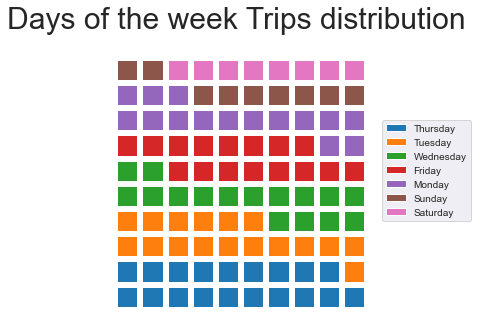

In [34]:
day_counts = percentage_blocks(df_new, 'start_day')

prev_count = 0
# for each category,
for day in range(day_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + day_counts[day])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += day_counts[day]

# aesthetic wrangling
plt.legend(day_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')
plt.title('Days of the week Trips distribution ',size=30)
plt.show()

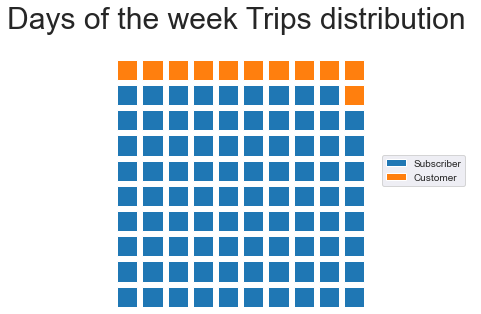

In [35]:
day_counts = percentage_blocks(df_new, 'user_type')

prev_count = 0
# for each category,
for day in range(day_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + day_counts[day])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += day_counts[day]

# aesthetic wrangling
plt.legend(day_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')
plt.title('Days of the week Trips distribution ',size=30)
plt.show()
 

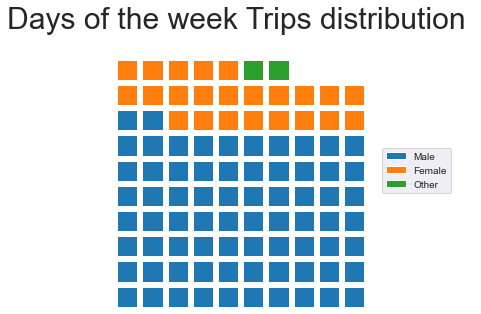

In [36]:
day_counts = percentage_blocks(df_new, 'member_gender')

prev_count = 0
# for each category,
for day in range(day_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + day_counts[day])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += day_counts[day]

# aesthetic wrangling
plt.legend(day_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square')
plt.title('Days of the week Trips distribution ',size=30)
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Converting longitude and latitude to Distance was very challenging but also very cool

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had subtracted useres birthday form Y2019 "year of the Data collection ".I was not surbrized that the peak hour was morning between 8and 9 and noon was between 17 and 18 and i think this is because of going to the work and retyrnback at taht time .

<a id='bivariate'></a>

## Bivariate Exploration
> In this section, we will make Bivariate Exploration to go further thought the data and get the needed relastions between coulmns.



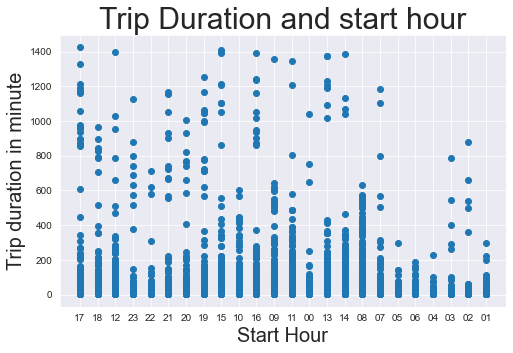

In [37]:
plt.scatter(data = df_new, x = 'start_hour', y = 'Duration_minute');
plt.xlabel('Start Hour',size=20)
plt.ylabel('Trip duration in minute',size=20)
plt.title('Trip Duration and start hour',size=30)
plt.show()

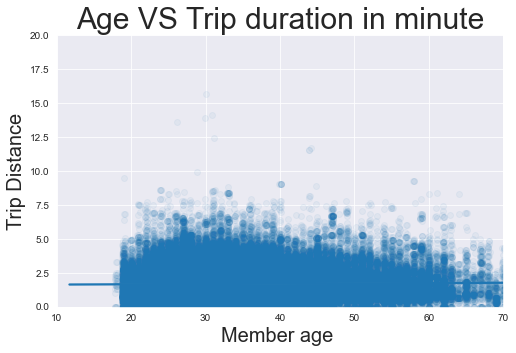

In [38]:
sb.regplot(data = df_new, x = 'member_age', y = 'distance',truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/20});
plt.xlim((10,70));
plt.ylim(0,20);
plt.xlabel('Member age ',size=20);
plt.ylabel('Trip Distance',size=20);
plt.title('Age VS Trip duration in minute',size=30)
plt.show()

Text(0.5, 1.0, 'birthday year to trip duration')

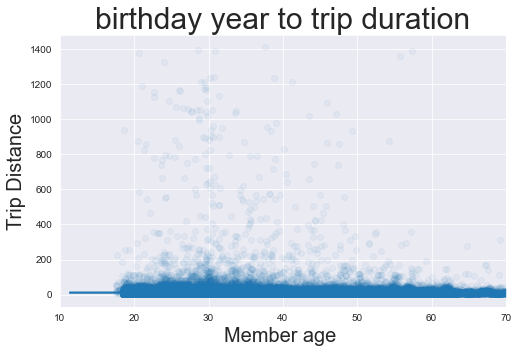

In [39]:
sb.regplot(data = df_new, x = 'member_age', y = 'Duration_minute',truncate=False, x_jitter=0.5, scatter_kws={'alpha':1/20});
plt.xlim((10,70));
plt.xlabel('Member age ',size=20)
plt.ylabel('Trip Distance',size=20);
plt.title('birthday year to trip duration',size=30)

In [40]:
df_new[['member_age','Duration_minute','distance']].describe()

,member_age,Duration_minute,distance
count,175147.000000,183412.000000,183412.000000
mean,34.193563,12.101307,1.690661
std,10.116689,29.906496,1.097591
min,18.000000,1.016667,0.000000
25%,27.000000,5.416667,0.910957
50%,32.000000,8.566667,1.430740
75%,39.000000,13.266667,2.225690
max,141.000000,1424.066667,69.469337


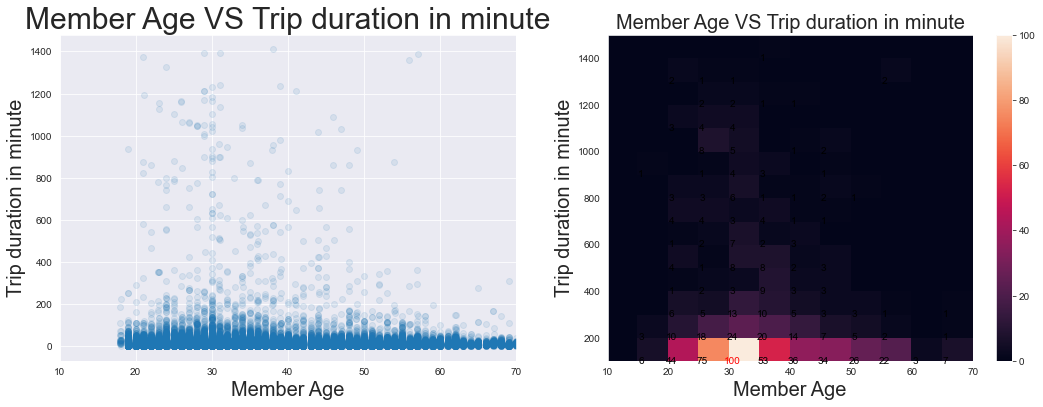

In [124]:
# try to use heat map
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df_new, x = 'member_age', y = 'Duration_minute', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlim([10,70])
plt.xlabel('Member Age',size=20)
plt.ylabel('Trip duration in minute',size=20);
plt.title('Member Age VS Trip duration in minute',size=30)
# PLOT ON RIGHT
plt.subplot(1, 2, 2)
bins_x = np.arange(10, 70+5,5)
bins_y = np.arange(100, 1500+100, 100)
h2d=plt.hist2d(data = df_new, x = 'member_age', y = 'Duration_minute', bins = [bins_x, bins_y])
plt.colorbar();
plt.xlabel('Member Age',size=20)
plt.ylabel('Trip duration in minute',size=20);
plt.title('Member Age VS Trip duration in minute',size=20)

counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),ha = 'center', va = 'center', color = 'red')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),ha = 'center', va = 'center', color = 'black')

In [ ]:
- after checking the above figs we found that the tailest  distances had been made from useres between 25 and 35 years .

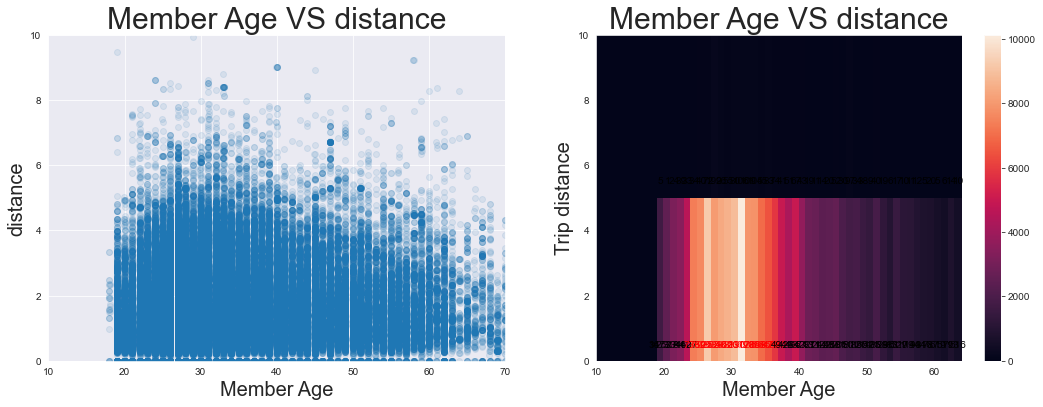

In [123]:
# try to use heat map
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df_new, x = 'member_age', y = 'distance', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Member Age',size=20)
plt.xlim([10,70])
plt.ylim([0,10])
plt.ylabel('distance',size=20);
plt.title('Member Age VS distance',size=30)
# PLOT ON RIGHT
plt.subplot(1, 2, 2)
bins_x = np.arange(10,60+5) 
bins_y = np.arange(0, 10+5, 5)
h2d=plt.hist2d(data = df_new, x = 'member_age', y = 'distance', bins = [bins_x, bins_y])
plt.colorbar();
plt.xlabel('Member Age',size=20)
plt.ylabel('Trip distance',size=20);
plt.title('Member Age VS distance',size=30)

counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 5000: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),ha = 'center', va = 'center', color = 'red')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),ha = 'center', va = 'center', color = 'black')

- after checking the above figs we found that the longest distances had been made from useres between 25 and 35 years .
- that mean tallest and longest Trips are made by the same age .

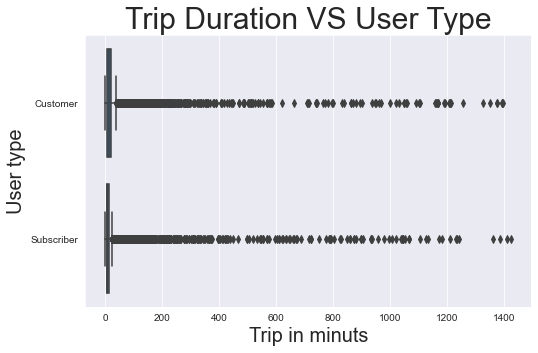

In [129]:

sb.boxplot(data = df_new, x = 'Duration_minute', y = 'user_type', color = base_color)
plt.title('Trip Duration VS User Type',size=30)
plt.xlabel('Trip in minuts',size=20)
plt.ylabel('User type',size=20)
plt.show()

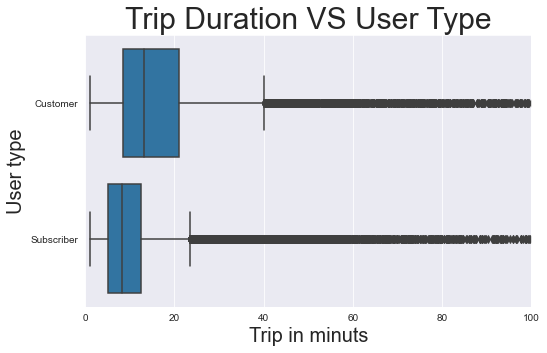

In [131]:

sb.boxplot(data = df_new, x = 'Duration_minute', y = 'user_type', color = base_color)
plt.title('Trip Duration VS User Type',size=30)
plt.xlabel('Trip in minuts',size=20)
plt.ylabel('User type',size=20)
plt.xlim([0,100])
plt.show()

- the above fig clears that the customers usually make longer trips that subscribers. while customers are about 11% of the total number which is very Stange 

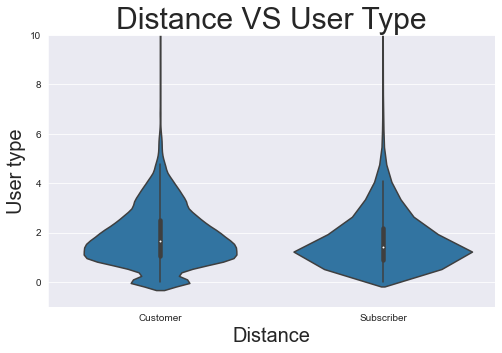

In [127]:

sb.violinplot(data = df_new, x ='user_type', y = 'distance', color = base_color)
plt.title('Distance VS User Type',size=30)
plt.xlabel('Distance',size=20)
plt.ylabel('User type',size=20)
plt.ylim([-1,10])
plt.show()

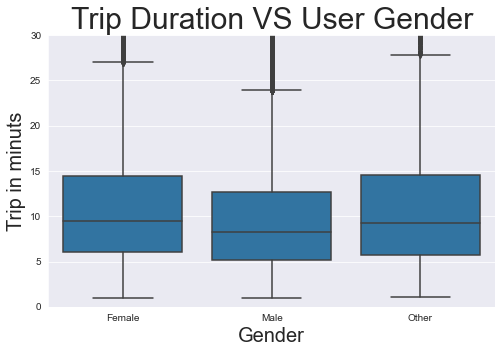

In [126]:

sb.boxplot(data = df_new, x = 'member_gender', y = 'Duration_minute', color = base_color)
plt.title('Trip Duration VS User Gender',size=30)
plt.xlabel('Gender',size=20)
plt.ylabel('Trip in minuts',size=20)
plt.ylim([0,30])
plt.show()

- This fig shows that Females makes longer Trips than males while about 75% of useres are males. 

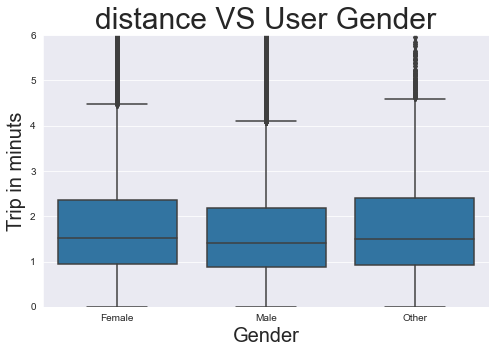

In [133]:
sb.boxplot(data = df_new, x = 'member_gender', y = 'distance', color = base_color)
plt.title('distance VS User Gender',size=30)
plt.xlabel('Gender',size=20)
plt.ylabel('Trip in minuts',size=20)
plt.ylim([0,6])
plt.show()

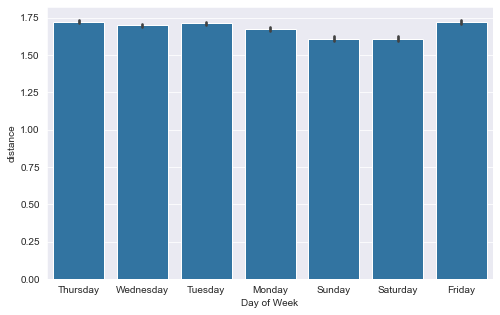

In [134]:
sb.barplot(data=df_new, x='start_day', y='distance', color=base_color);
plt.xlabel('Day of Week');
plt.ylabel('distance');

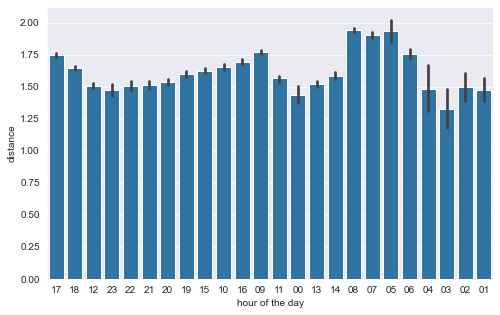

In [135]:
sb.barplot(data=df_new, x='start_hour', y='distance', color=base_color);
plt.xlabel('hour of the day');
plt.ylabel('distance');

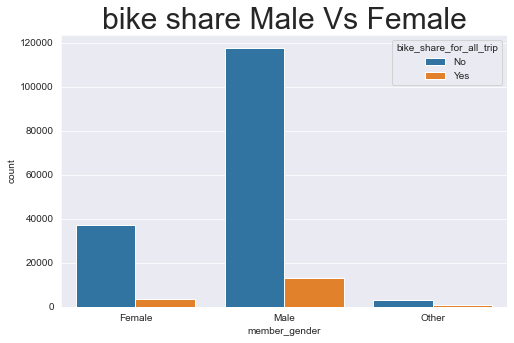

In [136]:
sb.countplot(data = df_new, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.title("bike share Male Vs Female",size=30)
plt.show()

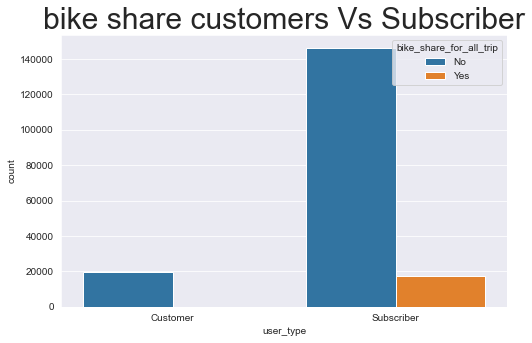

In [140]:
sb.countplot(data = df_new, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.title("bike share customers Vs Subscriber",size=30)
plt.show()

- subscribes used to share bikes while customers not sharing it 

In [138]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

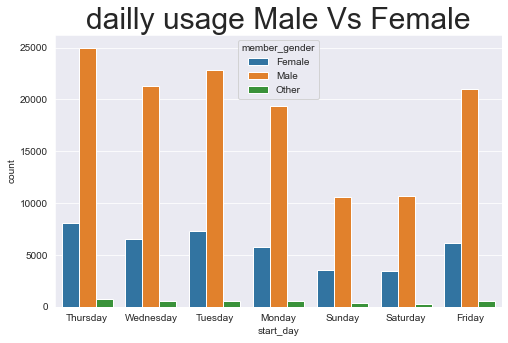

In [137]:
sb.countplot(data = df_new, x = 'start_day', hue = 'member_gender')
plt.title("dailly usage Male Vs Female",size=30)
plt.show()

- the above fig shows that males are used bikes more than females noting that usage is fewer during week-end that during week days 

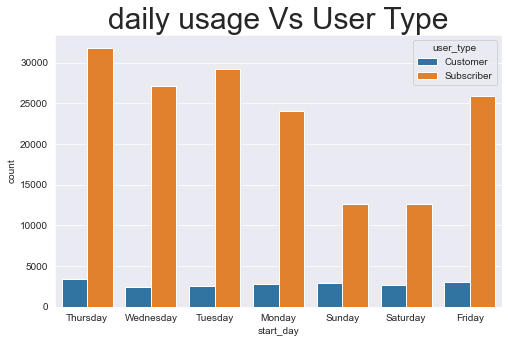

In [50]:
sb.countplot(data = df_new, x = 'start_day', hue = 'user_type')
plt.title("daily usage Vs User Type",size=30)
plt.show()

- the above fig shows that subscribes usage is fewer during week end while customers almost the same .

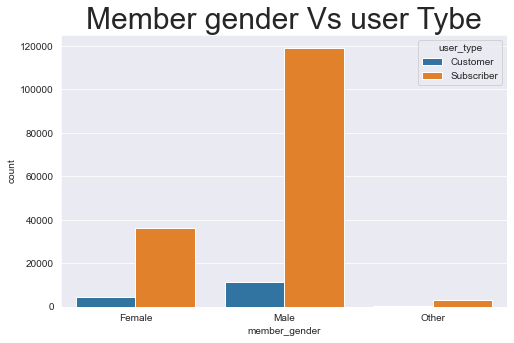

In [52]:
sb.countplot(data = df_new, x = 'member_gender', hue = 'user_type')
plt.title("Member gender Vs user Tybe",size=30)
plt.show()

-this fig shows too that males uses bikes more that femials as a Customers or a Subscribes 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Males uses bikes more that females.
- subscribes uses bike share on there trips while customes not.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- subscribes uses bikes during working days more that during week-end while customers are almost the same .
- distance and trip durations by females are longer that males while males are about 75 % of the useres .

<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

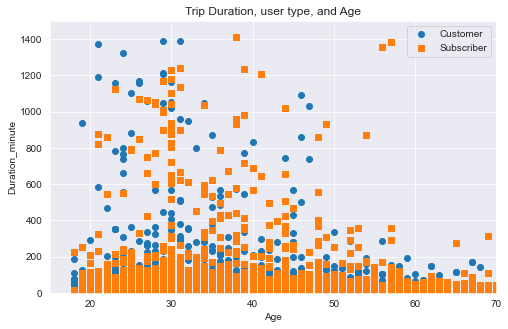

In [86]:
usertype_mark = [['Customer', 'o'],['Subscriber', 's']]

for user_t, marker in usertype_mark:
    df_ut = df_new[df_new['user_type'] == user_t]
    plt.scatter(( df_ut['member_age']), df_ut['Duration_minute'], marker = marker, alpha= 1)
plt.legend(['Customer','Subscriber'])
plt.axis([15, 70, 0, 1500 ])
plt.title('Trip Duration, user type, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_minute')
plt.show()

- number of subscribes over 60 years more that number of customers on the same age 

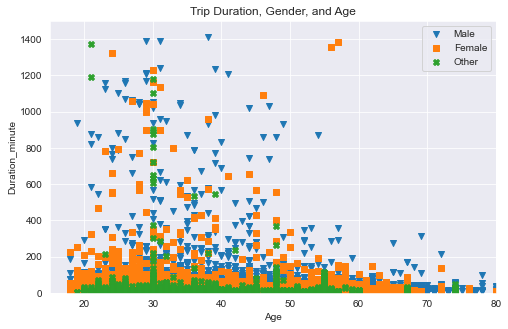

In [85]:
gender_mark = [['Male', 'v'],['Female', 's'],['Other', 'X']]

for gender, marker in gender_mark:
    df_g = df_new[df_new['member_gender'] == gender]
    plt.scatter((df_g['member_age']), df_g['Duration_minute'], marker = marker, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.axis([15, 80, -0, 1500 ])
plt.title('Trip Duration, Gender, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_minute')
plt.show()

- older males makes longer trips durations than older females.

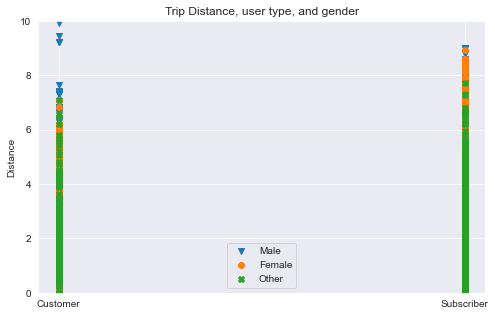

In [141]:
user_mark = [['Male', 'v'],['Female', 'o'],['Other', 'X']]
for user, marker in user_mark:
    df_user = df_new[df_new['member_gender'] == user]
    user_type=(df_user['user_type'])
    plt.scatter(user_type, df_user['distance'], marker = marker, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.ylim([0,10])
plt.title('Trip Distance, user type, and gender')
plt.ylabel('Distance')
plt.show()

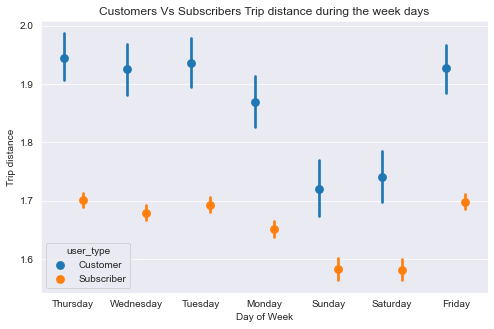

In [145]:
sb.pointplot(data=df_new, x='start_day', y='distance', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Trip distance');
plt.title('Customers Vs Subscribers Trip distance during the week days')
plt.show()

- customers make longer Trip distances that subscribers 

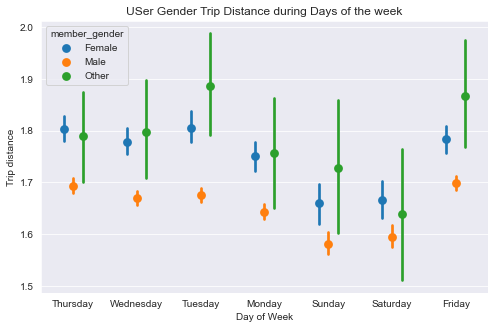

In [147]:
sb.pointplot(data=df_new, x='start_day', y='distance', hue='member_gender', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Trip distance');
plt.title('USer Gender Trip Distance during Days of the week')
plt.show()

- Females users made longer trips that males 

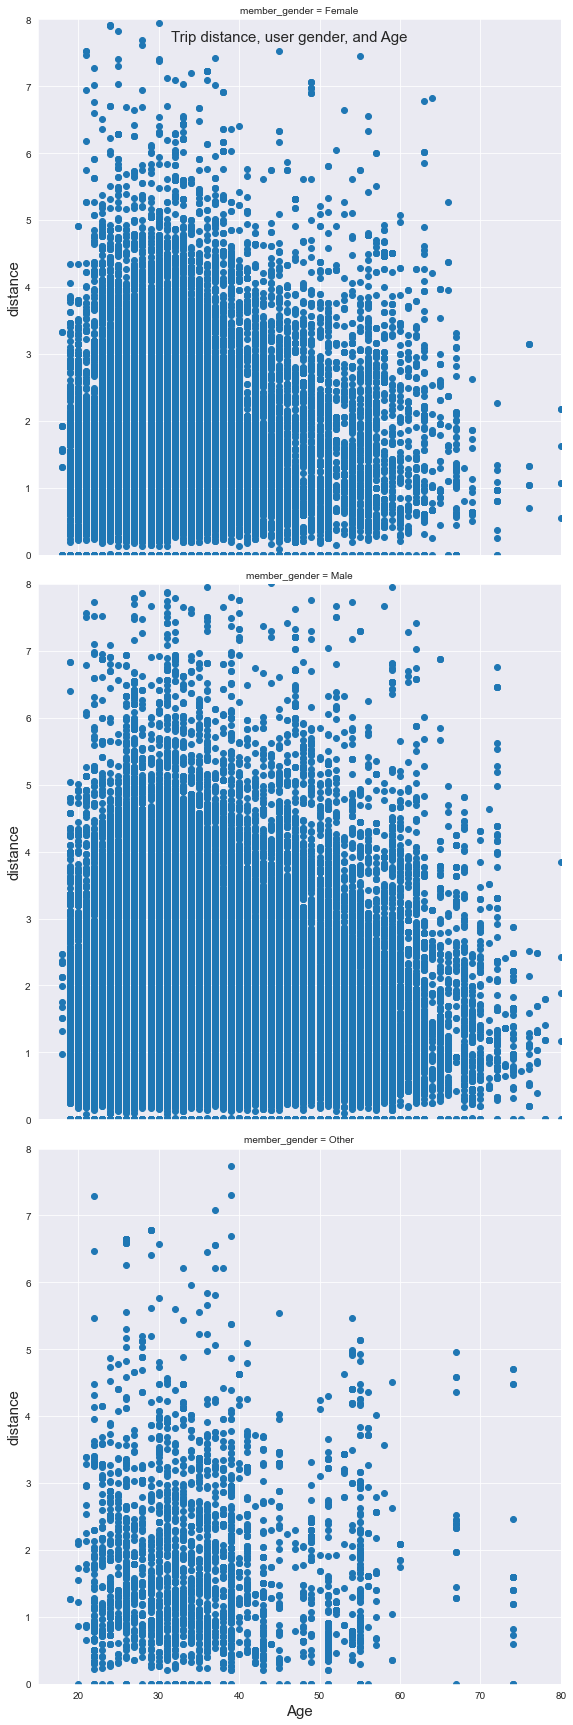

In [149]:
user_type = sb.FacetGrid(data = df_new, col = 'member_gender', col_wrap = 1, size = 8,
                 xlim = [15, 80], ylim = [0, 8])
user_type.map(plt.scatter, 'member_age', 'distance', alpha= 1)

user_type.set_xlabels('Age',size=15)
user_type.set_ylabels('distance',size=15)
user_type.fig.suptitle('Trip distance, user gender, and Age',size=15)
plt.show()

- older males makes longer distance trips that females while females made the longest ditance in general .

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Females users made longer trips that males 
- customers make longer Trip distances that subscribers 
### Were there any interesting or surprising interactions between features?

- number of subscribes over 60 years more that number od customers on the same age
- older males maked longer trips durations that older females.
- older males makes longer distance trips that females while females made teh longest ditance in general .

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!